<a href="https://colab.research.google.com/github/User-Galih/capstone-project-bengkod/blob/main/Deploy_14359_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load file CSV dari folder di Google Drive
file_path = '/content/drive/MyDrive/Semester 6/BengKod/ObesityDataSet_Cleaned.csv'
df = pd.read_csv(file_path)

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,0,1.62,64.0,3,0,2.0,3.000000,0,0,2.0,1,0.0,1.0,2,3,Normal_Weight
1,21.0,0,1.52,56.0,2,0,3.0,3.000000,1,1,3.0,1,3.0,0.0,2,3,Normal_Weight
2,23.0,1,1.80,77.0,1,0,2.0,3.000000,0,0,2.0,1,2.0,1.0,2,3,Normal_Weight
3,27.0,1,1.80,87.0,1,0,3.0,3.000000,0,0,2.0,0,2.0,0.0,2,4,Overweight_Level_I
4,22.0,1,1.78,89.8,2,0,2.0,2.307067,0,0,2.0,0,0.0,0.0,2,3,Overweight_Level_II


<ipython-input-2-956326083>:13: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


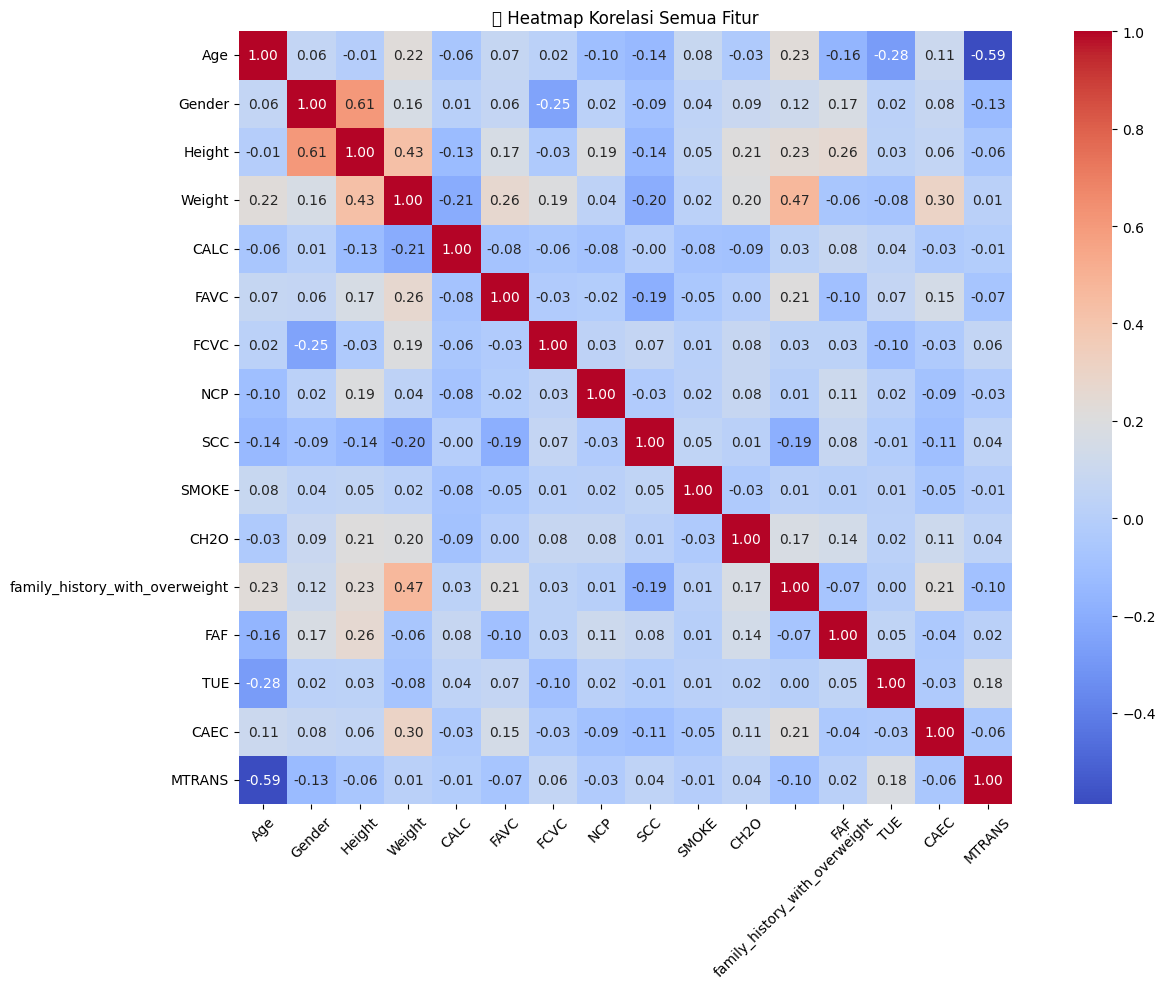

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


numeric_df = df.drop('NObeyesdad', axis=1)

# Hitung korelasi Pearson
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("🔍 Heatmap Korelasi Semua Fitur")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [3]:

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif
import pandas as pd
import matplotlib.pyplot as plt

# Encode target label
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(df['NObeyesdad'])

# Pisahkan fitur
X_features = df.drop('NObeyesdad', axis=1)

Korelasi fitur dengan label berdasarkan ANOVA F-score:
                           Feature      F-score        p-value
3                           Weight  1172.911459   0.000000e+00
1                           Gender   152.933538  3.963203e-161
11  family_history_with_overweight   146.500016  2.688232e-155
6                             FCVC    98.284929  4.616745e-109
0                              Age    91.730815  2.102552e-102
14                            CAEC    77.825839   5.914431e-88
5                             FAVC    42.933237   1.215749e-49
7                              NCP    35.687010   2.650286e-41
2                           Height    35.425926   5.322810e-41
4                             CALC    33.158489   2.307606e-38
15                          MTRANS    26.969756   4.178366e-31
8                              SCC    22.579830   6.574214e-26
12                             FAF    17.821712   3.059061e-20
10                            CH2O    14.526551   2.641076e-16


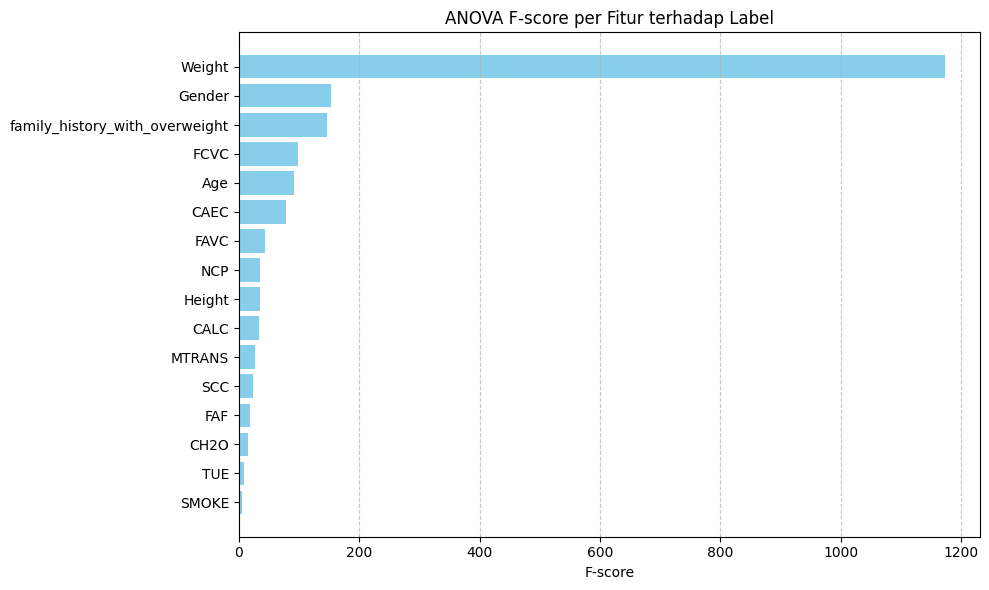

In [4]:
# Hitung F-score ANOVA
f_scores, p_values = f_classif(X_features, y_encoded)

# Simpan ke DataFrame
anova_df = pd.DataFrame({
    'Feature': X_features.columns,
    'F-score': f_scores,
    'p-value': p_values
}).sort_values(by='F-score', ascending=False)

# Tampilkan tabel korelasi
print("Korelasi fitur dengan label berdasarkan ANOVA F-score:")
print(anova_df)

# Visualisasi dengan horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(anova_df['Feature'], anova_df['F-score'], color='skyblue')
plt.xlabel('F-score')
plt.title('ANOVA F-score per Fitur terhadap Label')
plt.gca().invert_yaxis()  # Fitur tertinggi di atas
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Berdasarkan hasil seleksi fitur menggunakan metode ANOVA F-score, saya memilih 5 fitur teratas yang memiliki korelasi paling tinggi terhadap label klasifikasi, yaitu: Weight (Berat Badan), Gender (Jenis Kelamin), family_history_with_overweight (Riwayat Keluarga yang Kelebihan Berat Badan), FCVC (Apakah Anda Makan Sayur?), dan Age (Usia).

## Namun, demi kemudahan dan relevansi dalam proses deployment, saya mengganti fitur FCVC dengan fitur Height (Tinggi Badan). Keputusan ini diambil untuk menyesuaikan dengan pendekatan yang digunakan oleh organisasi seperti WHO dan metode Body Mass Index (BMI), yang mempertimbangkan berat badan dan tinggi badan sebagai indikator utama untuk mengukur status gizi seseorang.

## Referensi:

Referensi:
## - [BMI Calculator – Calculator.net](https://www.calculator.net/bmi-calculator.html)
## - [Truth About Weight – Global Initiative](https://www.truthaboutweight.global/)


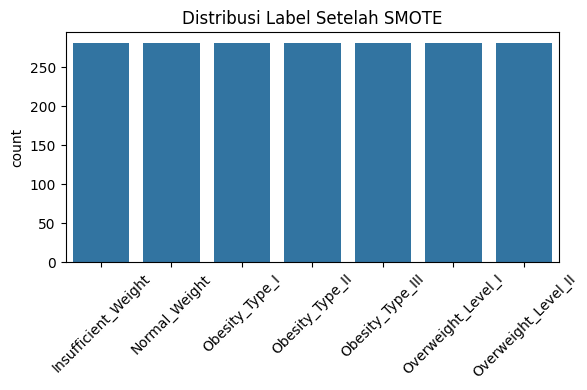

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Pisahkan fitur dan label hanya berdasarkan selected features
selected_features = ['Age', 'Gender', 'Height', 'Weight', 'family_history_with_overweight']
X = df[selected_features]  # gunakan hanya fitur terpilih
y = y_encoded  # hasil LabelEncoder

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Terapkan SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Konversi kembali ke DataFrame agar kolomnya tetap jelas
X_train = pd.DataFrame(X_train, columns=selected_features)
X_test = pd.DataFrame(X_test, columns=selected_features)

# Visualisasi label hasil SMOTE
mapping = dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title('Distribusi Label Setelah SMOTE')
plt.xticks(ticks=range(len(mapping)), labels=le_target.classes_, rotation=45)
plt.tight_layout()
plt.show()


Training Decision Tree...
--> Akurasi Detail untuk Decision Tree: 0.9475 atau 94.75%
--> Waktu Training: 0.0136 detik
Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       0.93      0.91      0.92        57
           2       0.95      0.99      0.97        70
           3       0.98      0.93      0.96        60
           4       0.98      0.97      0.98        65
           5       0.89      0.87      0.88        55
           6       0.93      0.95      0.94        58

    accuracy                           0.95       419
   macro avg       0.95      0.95      0.95       419
weighted avg       0.95      0.95      0.95       419



Training Random Forest...
--> Akurasi Detail untuk Random Forest: 0.9475 atau 94.75%
--> Waktu Training: 1.0013 detik
Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.96   

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:09:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--> Akurasi Detail untuk XGBoost: 0.9499 atau 94.99%
--> Waktu Training: 2.8013 detik
Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        54
           1       0.91      0.93      0.92        57
           2       0.94      0.97      0.96        70
           3       0.98      0.97      0.97        60
           4       1.00      0.97      0.98        65
           5       0.89      0.87      0.88        55
           6       0.96      0.93      0.95        58

    accuracy                           0.95       419
   macro avg       0.95      0.95      0.95       419
weighted avg       0.95      0.95      0.95       419



Training SVM...
--> Akurasi Detail untuk SVM: 0.8950 atau 89.50%
--> Waktu Training: 0.1884 detik
Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        54
           1       0.95      0.70      0

<ipython-input-6-601300432>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y=metric, palette='viridis')
<ipython-input-6-601300432>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y=metric, palette='viridis')
<ipython-input-6-601300432>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y=metric, palette='viridis')
<ipython-input-6-601300432>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assig

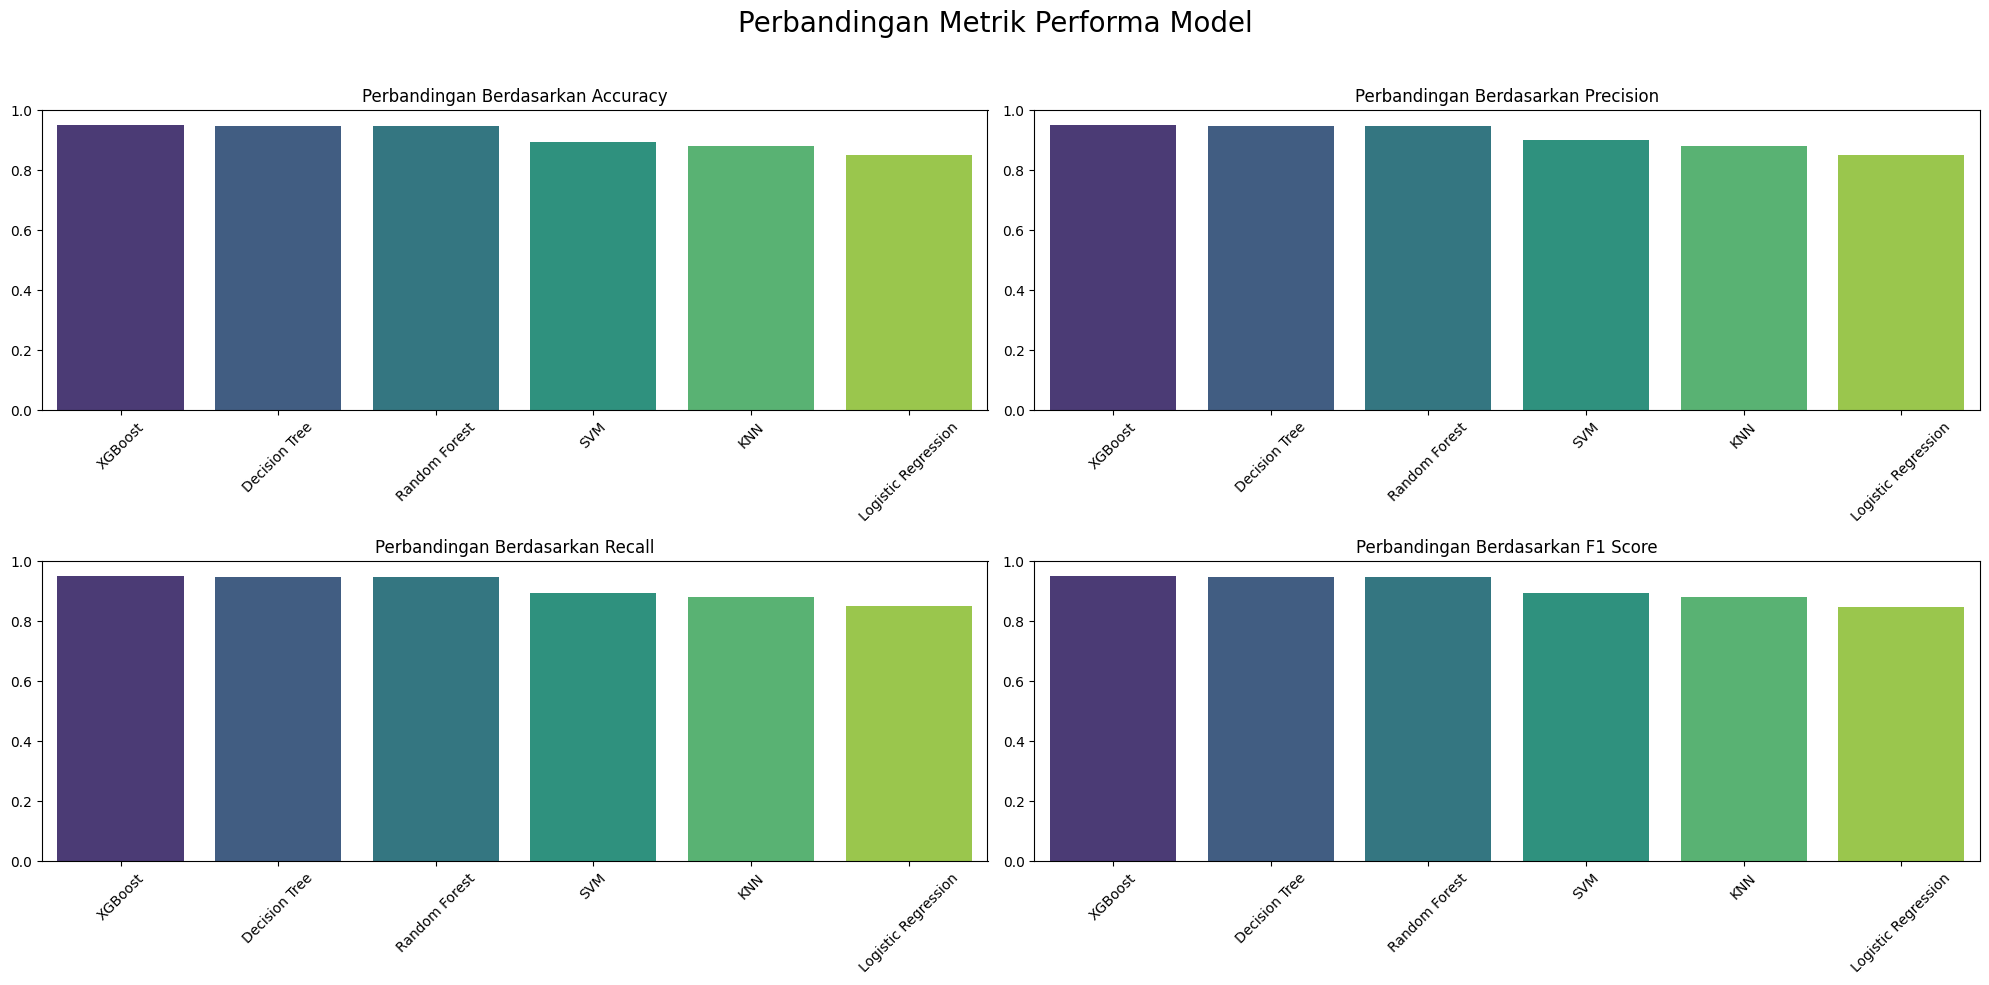

<ipython-input-6-601300432>:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df.sort_values(by='Training Time (s)', ascending=True), x='Model', y='Training Time (s)', palette='plasma')


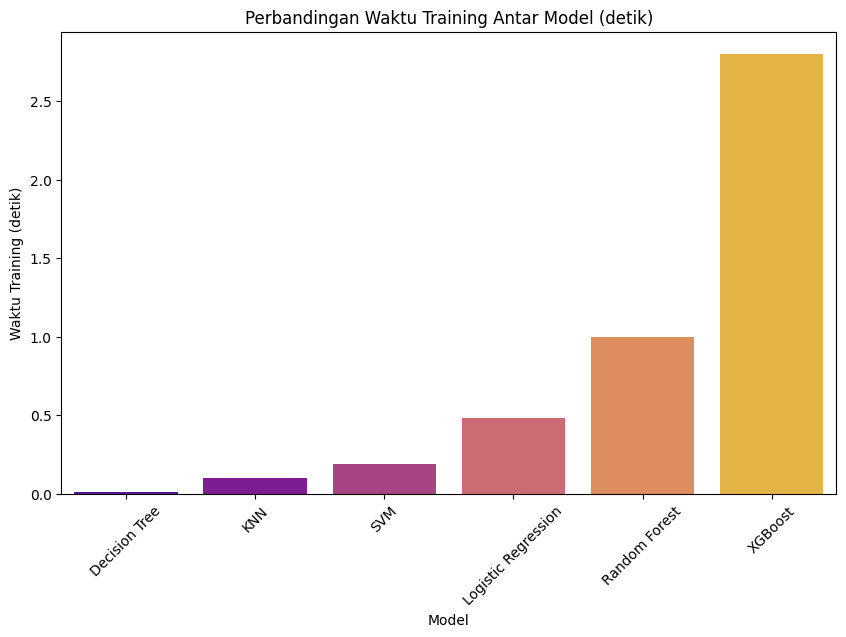

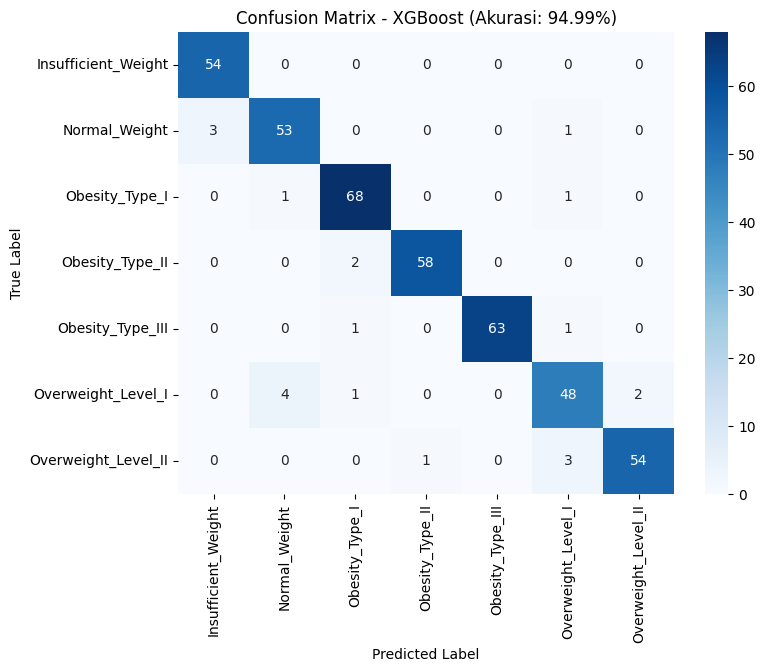

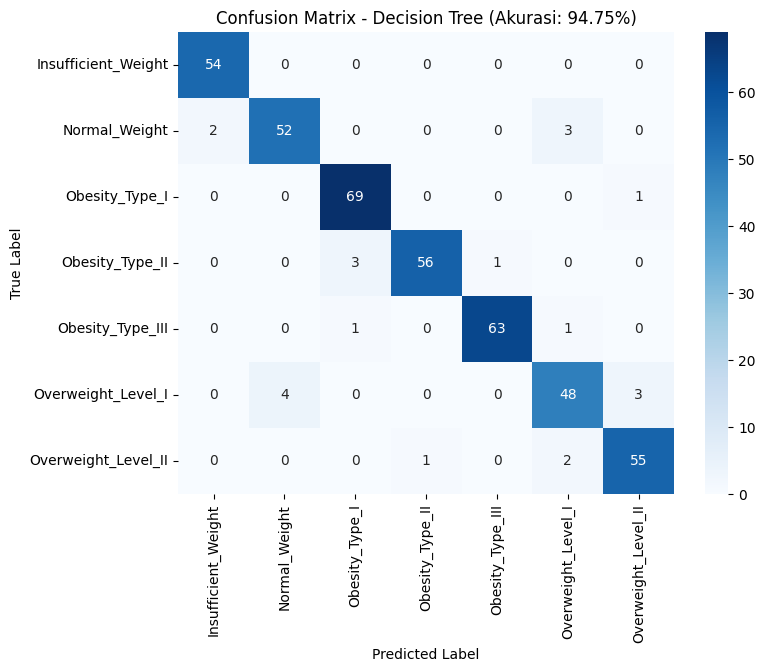

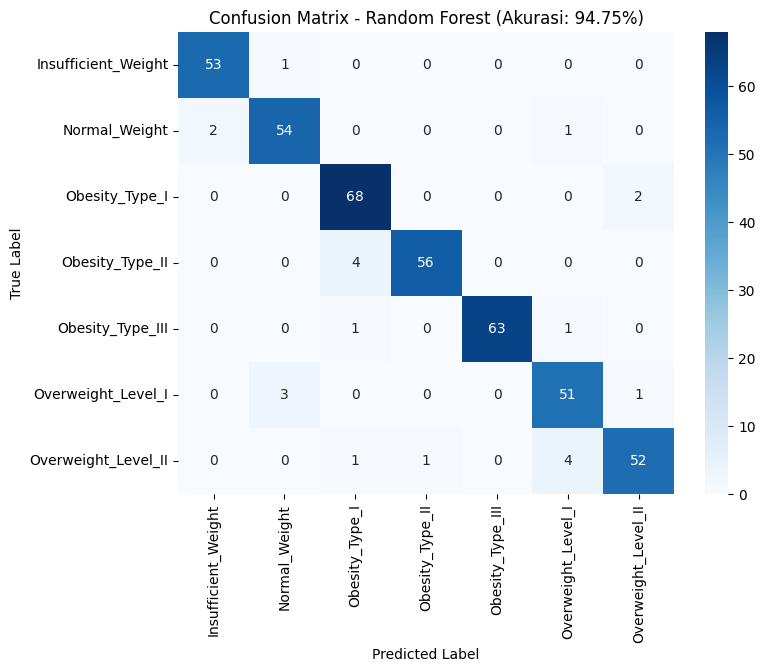

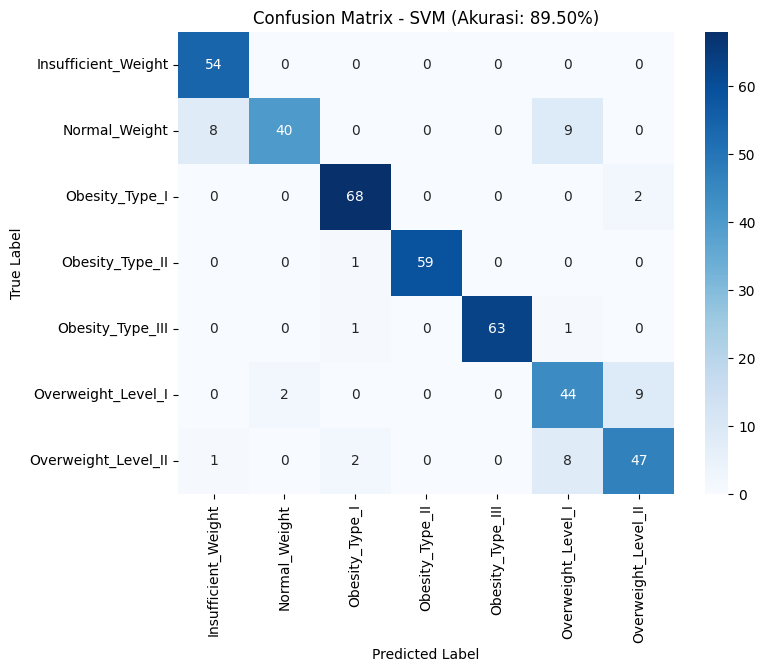

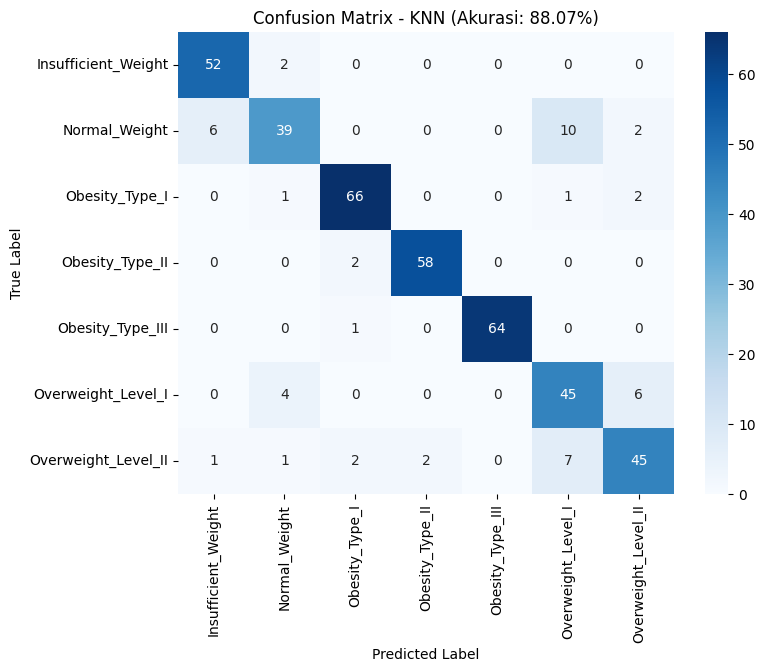

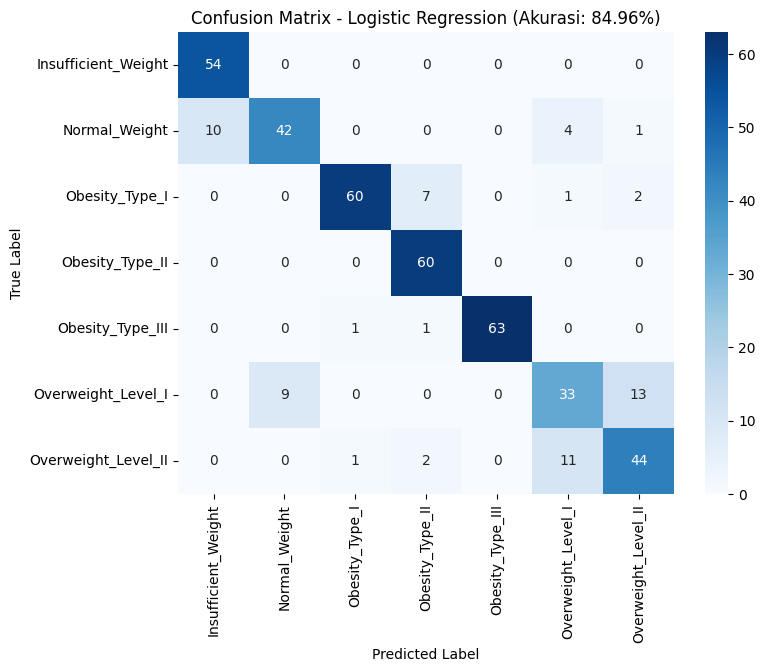

In [6]:
# Diasumsikan semua library dan data sudah siap
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Definisikan model
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

results = []
trained_models = {}

# Loop untuk setiap model
for name, model in models.items():
    print(f"Training {name}...")

    # Catat waktu mulai
    start_time = time.time()

    # Latih SEMUA model pada X_train dan y_train yang sudah diproses (scaled & SMOTE)
    model.fit(X_train, y_train)

    # Lakukan prediksi pada X_test yang sudah di-scaling
    y_pred = model.predict(X_test)

    # Catat waktu selesai dan hitung durasi
    end_time = time.time()
    training_time = end_time - start_time

    # Simpan model yang sudah dilatih
    trained_models[name] = model

    # Hitung metrik evaluasi
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    print(f"--> Akurasi Detail untuk {name}: {acc:.4f} atau {acc:.2%}")
    print(f"--> Waktu Training: {training_time:.4f} detik")

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'Training Time (s)': training_time,
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    })

    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("\n" + "="*60 + "\n")

# Buat DataFrame hasil
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)

# Tampilkan DataFrame hasil dengan waktu training
print("Tabel Perbandingan Hasil Model:")
print(results_df.drop('Confusion Matrix', axis=1))


# --- Visualisasi (Kode visualisasi Anda diletakkan di sini dan tidak perlu diubah) ---

# Visualisasi perbandingan metrik performa model
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plt.figure(figsize=(20, 10))
plt.suptitle('Perbandingan Metrik Performa Model', fontsize=20)
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(data=results_df, x='Model', y=metric, palette='viridis')
    plt.title(f'Perbandingan Berdasarkan {metric}')
    plt.xlabel(None)
    plt.ylabel(None)
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Visualisasi khusus untuk waktu training
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.sort_values(by='Training Time (s)', ascending=True), x='Model', y='Training Time (s)', palette='plasma')
plt.title('Perbandingan Waktu Training Antar Model (detik)')
plt.xlabel('Model')
plt.ylabel('Waktu Training (detik)')
plt.xticks(rotation=45)
plt.show()


# Visualisasi confusion matrix
for index, row in results_df.iterrows():
    plt.figure(figsize=(8,6))
    sns.heatmap(row['Confusion Matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=le_target.classes_, yticklabels=le_target.classes_)
    plt.title(f"Confusion Matrix - {row['Model']} (Akurasi: {row['Accuracy']:.2%})")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [7]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import time

# Setup parameter grid
param_grid = {
    'n_estimators': [150, 250, 350],
    'learning_rate': [0.05, 0.1],
    'max_depth': [5, 6, 7],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'gamma': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

# Setup cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
xgb = XGBClassifier(objective='multi:softmax', eval_metric='mlogloss', use_label_encoder=False, random_state=42)

# Hyperparameter tuning dengan RandomizedSearchCV
search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=50,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

print("🔍 Memulai hyperparameter tuning...")
start = time.time()
search.fit(X_train, y_train)
end = time.time()
print(f"⏱️ Tuning selesai dalam {end - start:.2f} detik")
print("📌 Parameter terbaik:", search.best_params_)
print(f"📊 Skor akurasi cross-validation: {search.best_score_:.4f}")

# Evaluasi model terbaik
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

print("\n==============================")
print("✅ HASIL EVALUASI MODEL XGBOOST")
print("==============================")
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi pada Data Uji: {accuracy:.4f} atau {accuracy:.2%}")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))


🔍 Memulai hyperparameter tuning...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:12:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


⏱️ Tuning selesai dalam 140.94 detik
📌 Parameter terbaik: {'subsample': 0.9, 'reg_lambda': 1.5, 'n_estimators': 350, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
📊 Skor akurasi cross-validation: 0.9593

✅ HASIL EVALUASI MODEL XGBOOST
Akurasi pada Data Uji: 0.9594 atau 95.94%

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       0.95      0.95      0.95        57
           2       0.96      0.99      0.97        70
           3       1.00      0.98      0.99        60
           4       0.98      0.97      0.98        65
           5       0.89      0.89      0.89        55
           6       0.96      0.93      0.95        58

    accuracy                           0.96       419
   macro avg       0.96      0.96      0.96       419
weighted avg       0.96      0.96      0.96       419




📊 Perbandingan Performa XGBoost (Sebelum vs Sesudah Tuning)

--- Sebelum Tuning ---
Akurasi: 0.9499 (94.99%)
Precision (Weighted): 0.9503
Recall (Weighted): 0.9499
F1 Score (Weighted): 0.9498
Waktu Training: 2.8013 detik

Laporan Klasifikasi Sebelum Tuning:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        54
           1       0.91      0.93      0.92        57
           2       0.94      0.97      0.96        70
           3       0.98      0.97      0.97        60
           4       1.00      0.97      0.98        65
           5       0.89      0.87      0.88        55
           6       0.96      0.93      0.95        58

    accuracy                           0.95       419
   macro avg       0.95      0.95      0.95       419
weighted avg       0.95      0.95      0.95       419


--- Setelah Tuning ---
Akurasi: 0.9594 (95.94%)
Precision (Weighted): 0.9596
Recall (Weighted): 0.9594
F1 Score (Weighted): 0.9594


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:13:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Waktu Training Model Terbaik (Setelah Tuning): 10.3469 detik

Laporan Klasifikasi Setelah Tuning:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       0.95      0.95      0.95        57
           2       0.96      0.99      0.97        70
           3       1.00      0.98      0.99        60
           4       0.98      0.97      0.98        65
           5       0.89      0.89      0.89        55
           6       0.96      0.93      0.95        58

    accuracy                           0.96       419
   macro avg       0.96      0.96      0.96       419
weighted avg       0.96      0.96      0.96       419



<ipython-input-9-1564027948>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Sebelum Tuning', 'Setelah Tuning'], y=[results_before_tuning['Accuracy'], accuracy_tuned], palette='coolwarm')


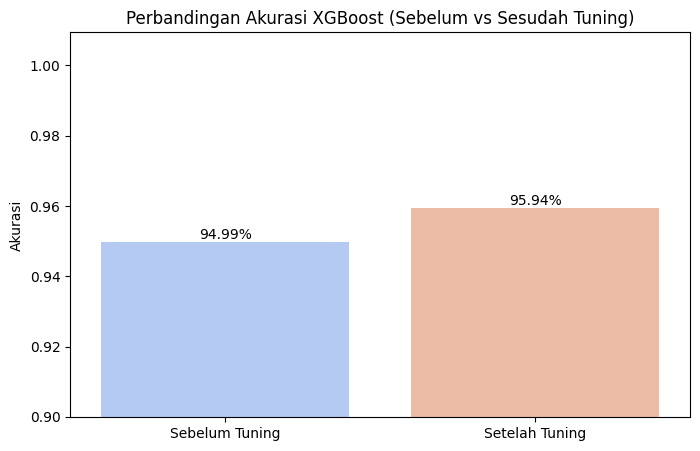

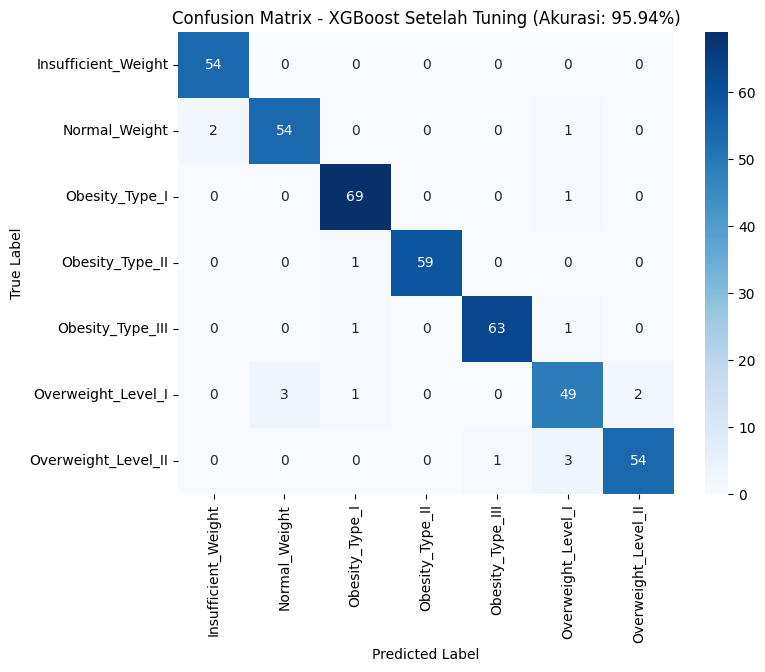

In [9]:
# prompt: lakukan perbandingan hasil model tanpa tuning dan setelah tuning xgboost

# Bandingkan hasil XGBoost sebelum dan setelah tuning
results_before_tuning = results_df[results_df['Model'] == 'XGBoost'].iloc[0]

print("\n=====================================================")
print("📊 Perbandingan Performa XGBoost (Sebelum vs Sesudah Tuning)")
print("=====================================================")

print("\n--- Sebelum Tuning ---")
print(f"Akurasi: {results_before_tuning['Accuracy']:.4f} ({results_before_tuning['Accuracy']:.2%})")
print(f"Precision (Weighted): {results_before_tuning['Precision']:.4f}")
print(f"Recall (Weighted): {results_before_tuning['Recall']:.4f}")
print(f"F1 Score (Weighted): {results_before_tuning['F1 Score']:.4f}")
print(f"Waktu Training: {results_before_tuning['Training Time (s)']:.4f} detik")
print("\nLaporan Klasifikasi Sebelum Tuning:\n")
print(classification_report(y_test, trained_models['XGBoost'].predict(X_test), zero_division=0))


print("\n--- Setelah Tuning ---")
accuracy_tuned = accuracy_score(y_test, y_pred)
report_tuned = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

print(f"Akurasi: {accuracy_tuned:.4f} ({accuracy_tuned:.2%})")
print(f"Precision (Weighted): {report_tuned['weighted avg']['precision']:.4f}")
print(f"Recall (Weighted): {report_tuned['weighted avg']['recall']:.4f}")
print(f"F1 Score (Weighted): {report_tuned['weighted avg']['f1-score']:.4f}")

# Hitung waktu training model terbaik setelah tuning (ini hanya waktu fitting model terbaik setelah ditemukan param terbaik)
start_best_fit = time.time()
best_model.fit(X_train, y_train) # Re-fit best model on full training data (optional but good practice)
end_best_fit = time.time()
training_time_tuned = end_best_fit - start_best_fit
print(f"Waktu Training Model Terbaik (Setelah Tuning): {training_time_tuned:.4f} detik")
print("\nLaporan Klasifikasi Setelah Tuning:\n")
print(classification_report(y_test, y_pred, zero_division=0))


# Visualisasi Perbandingan Akurasi
plt.figure(figsize=(8, 5))
sns.barplot(x=['Sebelum Tuning', 'Setelah Tuning'], y=[results_before_tuning['Accuracy'], accuracy_tuned], palette='coolwarm')
plt.title('Perbandingan Akurasi XGBoost (Sebelum vs Sesudah Tuning)')
plt.ylabel('Akurasi')
plt.ylim(min(results_before_tuning['Accuracy'], accuracy_tuned) - 0.05, max(results_before_tuning['Accuracy'], accuracy_tuned) + 0.05) # Adjust y-limit for better visualization
plt.text(0, results_before_tuning['Accuracy'], f"{results_before_tuning['Accuracy']:.2%}", ha='center', va='bottom')
plt.text(1, accuracy_tuned, f"{accuracy_tuned:.2%}", ha='center', va='bottom')
plt.show()

# Visualisasi Confusion Matrix Setelah Tuning
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=le_target.classes_, yticklabels=le_target.classes_)
plt.title(f"Confusion Matrix - XGBoost Setelah Tuning (Akurasi: {accuracy_tuned:.2%})")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [10]:
# Simpan model XGBoost terbaik setelah tuning
joblib.dump(best_model, save_path + 'model_xgb_tuned.pkl')

# Simpan scaler (scaler yang sama digunakan)
joblib.dump(scaler, save_path + 'scaler.pkl')

# Simpan selected features (fitur yang sama digunakan)
joblib.dump(selected_features, save_path + 'selected_features.pkl')

# Simpan LabelEncoder (penting untuk mapping kelas saat prediksi)
joblib.dump(le_target, save_path + 'label_encoder.pkl')


print("✅ Model XGBoost terbaik setelah tuning, scaler, fitur, dan LabelEncoder berhasil disimpan ke folder 'Bengkod'!")


✅ Model XGBoost terbaik setelah tuning, scaler, fitur, dan LabelEncoder berhasil disimpan ke folder 'Bengkod'!
